<img src="scikit_learn_logo.png">

## Árboles de decisión

Es un tipo de algoritmo que se utiliza tanto para resolver **problemas de regresión** como **problemas de clasificación**. Para modelos complejos, es común hacer uso de un conjunto de ellos al mismo tiempo. Esto lo veremos más adelante.

Es un modelo bastante utilizado en el mercado, ya que visualmente es autoexplicativo, se **interpreta muy bien**. Esto trae consigo algo muy importante: No solo la máquina es capaz de aprender de una serie de datos, si no que podemos nosotros aprovecharnos de ésto para aprender también!

Un árbol de decisión es una estructura de árbol similar a un diagrama de flujo donde un **nodo interno** representa una característica (o atributo), la **rama** representa una regla de decisión y cada **nodo hoja** representa el resultado. El nodo superior en un árbol de decisiones se conoce como nodo raíz.

Veamos un diagrama:

<img src = 'arbol_decision.png'>


En esta guía vamos a resolver un problema de clasificación  utilizando una base de datos que suele ponerse a modo de ejemplo: **iris dataset**.

In [1]:
import pandas as pd
import numpy as np

from sklearn import datasets  # scikit learn ofrece bbdd de ejemplos
# importamos el modelo y una función para graficar el resultado
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from IPython.display import Image  # lo usaremos para leer los pngs
import seaborn as sns
sns.set_style('darkgrid')

import os


In [2]:
# importamos la base de datos iris
iris = datasets.load_iris()

# iris es un objeto de tipo diccionario que alberga por un lado los datos,
# por otro lado la columna target, variable objetivo (ambos tipo numpy array)
# y trae también una descripcion de la base de datos etc

In [3]:
# Nos quedamos con las variables explicativas en X y objetivo en y
X = pd.DataFrame(iris.data, columns = ['Sepal Length', 'Sepal Width',\
                                       'Petal Length', 'Petal Width'])
y = iris.target

In [4]:
# descripción del df que tenemos como datos
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
Sepal Length    150 non-null float64
Sepal Width     150 non-null float64
Petal Length    150 non-null float64
Petal Width     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


Antes de nada y como siempre, vamos a separar el set de entrenamiento del set de testeo:

In [5]:
# Separamos  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,\
                                                   random_state = 42)

Para una primera visualización del árbol, vamos a quedarnos con un máximo de cuatro nodos, más que suficiente para entender el funcionamiento:

In [6]:
arbol_decision_sencillo = DecisionTreeClassifier(max_leaf_nodes = 4)
arbol_decision_sencillo.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
# Esportamos la visualización a un archivo .dot
variables_explicativas = ['Sepal Length', 'Sepal Width',\
                         'Petal Length', 'Petal Width']
export_graphviz(arbol_decision_sencillo,                # modelo entrenado
                'tree.dot',                             # nombre archivo
                feature_names = variables_explicativas)  # nombre variables

Hemos exportado el diagrama del árbol en un tipo de archivo que no es imagen, pero podemos convertirlo a **.png** con el siguiente comando.

In [10]:
# el '!' sirve para que el comando se ejecute directamente sobre la consola
# no es necesario usarlo si no estás trabajando sobre Jupyter
! dot -Tpng tree.dot -o tree.png

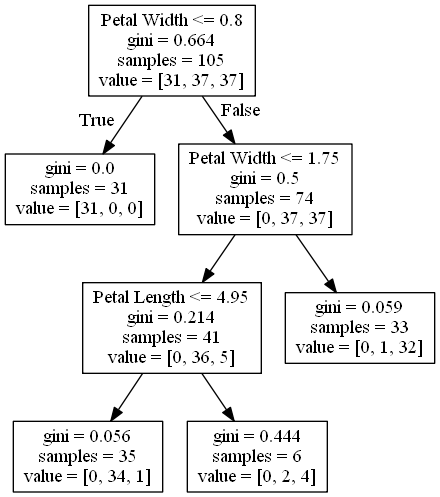

In [11]:
# mostramos el diagrama
Image('tree.png')

Repasamos el gráfico:
- Partimos del nodo raíz, donde se establece una condición **para separar de la mejor forma posible** el conjunto inicial de 105 muestras en **dos grupos**: petal width <= 0.8
- **Value** hace referencia a las muestras pertenecientes a los posibles valores de la variable objetivo.
- En caso afirmativo, nos quedamos con un grupo formado por 31 muestras, todas ellas del mismo tipo. Gini = 0
- ¿Qué es **gini**? una medida de la **impureza** de un conjunto. Cuanto más bajo es el valor, más homogeneo es el grupo (menor pluralidad).
- En caso afirmativo formaremos un grupo que dividimos de acuerdo a otra condición.
- Se repite el ciclo hasta satisfacer cierta condición: numero máximo de nodos, máximo de pureza, mínimo de muestras por rama, etc. 

Explicamos algunos de los parámetros del modelo:
- criterion: función de coste que sirve como criterio para realizar las divisiones del arbol.
    - gini
    - entropy: otra medida del desorden o impureza
- splitter: estrategia para elegir la condición en los nodos:
    - best: elige la mejor de entre todas
    - random: escoge una variable aleatoriamente y establece el mejor valor
- max_depth: máxima profundidad (nodos) del árbol
- min_samples_split: mínimo número de muestras para separar un nodo
- max_features: número de variables que se tienen en cuenta para elegir la mejor condición 
- random_state: semilla para hacer el algoritmo reproducible (ya que tiene un componente aleatorio)
- min_impurity_split: umbral que debe superarse de pureza para separar de nuevo el nodo
- ccp_alpha: parámetro de complejidad. Sirve para controlar un posible sobreajuste del modelo. Ahora entramos en profundidad

Una de las propiedades más interesantes de este algoritmo, es que permite calcular la importancia de las variables explicativas. Esto es muy útil usarlo como método de selección de características, el cual detallaremos en otro capítulo.

Basta con acceder al atributo **feature_importances_** una vez el árbol haya sido entrenado:

In [16]:
# Nos da un NumPy array de tamaño 4 (hemos usado 4 variables)
arbol_decision_sencillo.feature_importances_

array([0.        , 0.        , 0.06597277, 0.93402723])

Este *mini-árbol* nos dice que la variable que más le ha ayudado a clasificar las muestras es la última: **'Sepal Length', 'Sepal Width',\
**Petal Width**.
    
Seguramente si entrenamos un árbol con mayor profundidad, estos valores sean completamente distintos, hagámos la prueba y veamos el resultado final del modelo:

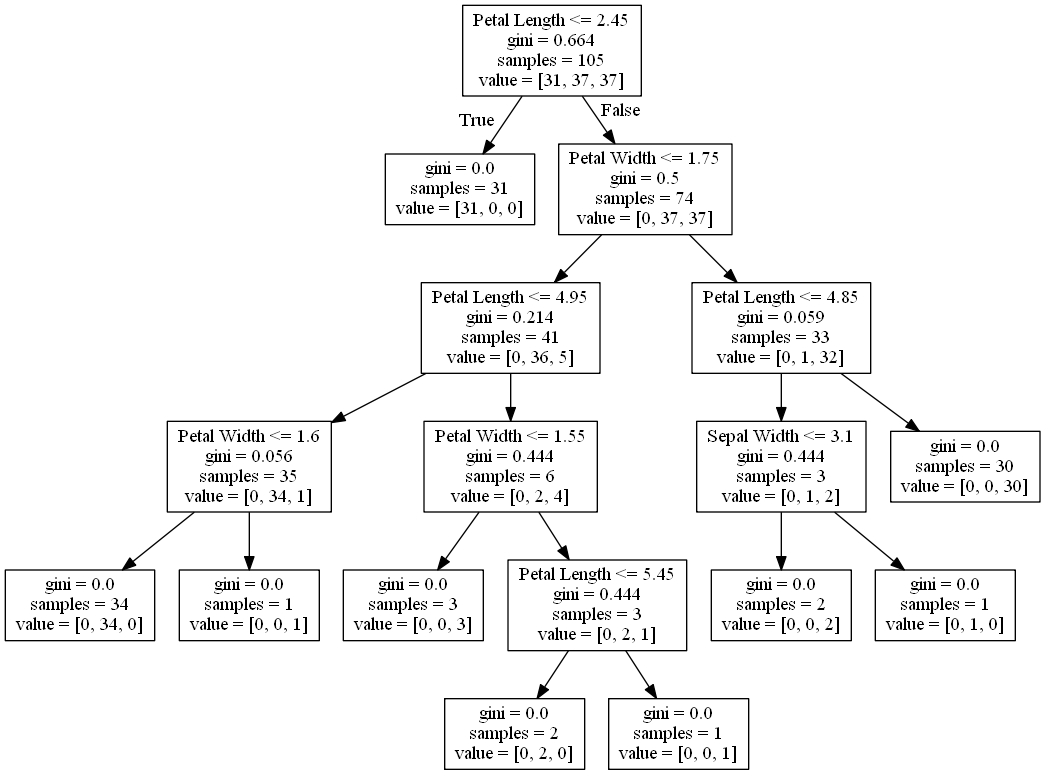

In [18]:
# dejamos para este ejemplo los argumentos por defecto
arbol_decision = DecisionTreeClassifier()
arbol_decision.fit(X_train, y_train)

variables_explicativas = ['Sepal Length', 'Sepal Width',\
                         'Petal Length', 'Petal Width']
export_graphviz(arbol_decision,                
                'tree_complete.dot',                            
                feature_names = variables_explicativas)  

! dot -Tpng tree_complete.dot -o tree_complete.png

Image('tree_complete.png')

In [19]:
# sale algo completamente distinto al caso anterior
# ya que el árbol se ha podido expander más 
arbol_decision.feature_importances_

array([0.        , 0.01911002, 0.55727376, 0.42361622])

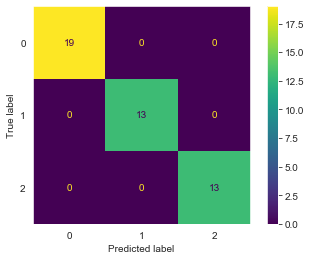

In [29]:
# analizamos los resultados con la matriz de confusión
# para esta muestra en concreto nuestrto modelo no tiene fallos
plot_confusion_matrix(arbol_decision,X_test, y_test)
plt.grid(False)

In [ ]:
# predecimos las clases del conjunto de testeo
predicciones = arbol_decision.predict(X_test)

In [31]:
# Como se ha podido ver en la matriz de confusión, no teniamos fallos en este
# set de testeo, nuestro modelo es preciso al 100% para esta muestra
accuracy_score(y_test, predicciones)

1.0

En otro capítulo vamos a ver otras formas de estimar la bondad de nuestro algoritmo clasificador de una manera más robusta y fiable: **validación cruzada**

Los árboles de decicisión, al igual que ocurre con la regresión logística, pueden devolver la probabilidad para una determinada clasificación, de nuevo, mediante el método **predict_proba()**

In [35]:
# Miramos solo las 3 primeras para hacernos una idea
probabilidades_pred = arbol_decision.predict_proba(X_test[:3])

In [36]:
# en estos 3 casos el modelo lo tiene claro
probabilidades_pred

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

Terminamos este primer capítulo de árboles de decisión para clasificar con la librería scikit learn.

En el siguiente capítulo vamos a ver uno de los conceptos más importantes a tener en cuenta cuando se trabaja con este tipo de algoritmos: el **sobreajuste**.